In [1]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt
import re

In [2]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams['font.size'] = 12

In [3]:
cwd = os.getcwd()
base_dir = os.path.dirname(cwd)
data_dir = os.path.join(base_dir, 'data')

classical_chem_dir = os.path.join(data_dir,
                                  'N2_data')

In [4]:
subdirs = [f for f in os.listdir(classical_chem_dir) if os.path.isdir(os.path.join(classical_chem_dir,
                                                            f)) and f != 'log']
subdirs

['N2_ccpvdz', 'N2_ccpvqz', 'N2_ccpvtz']

N2_ccpvdz
N2_ccpvqz
N2_ccpvtz


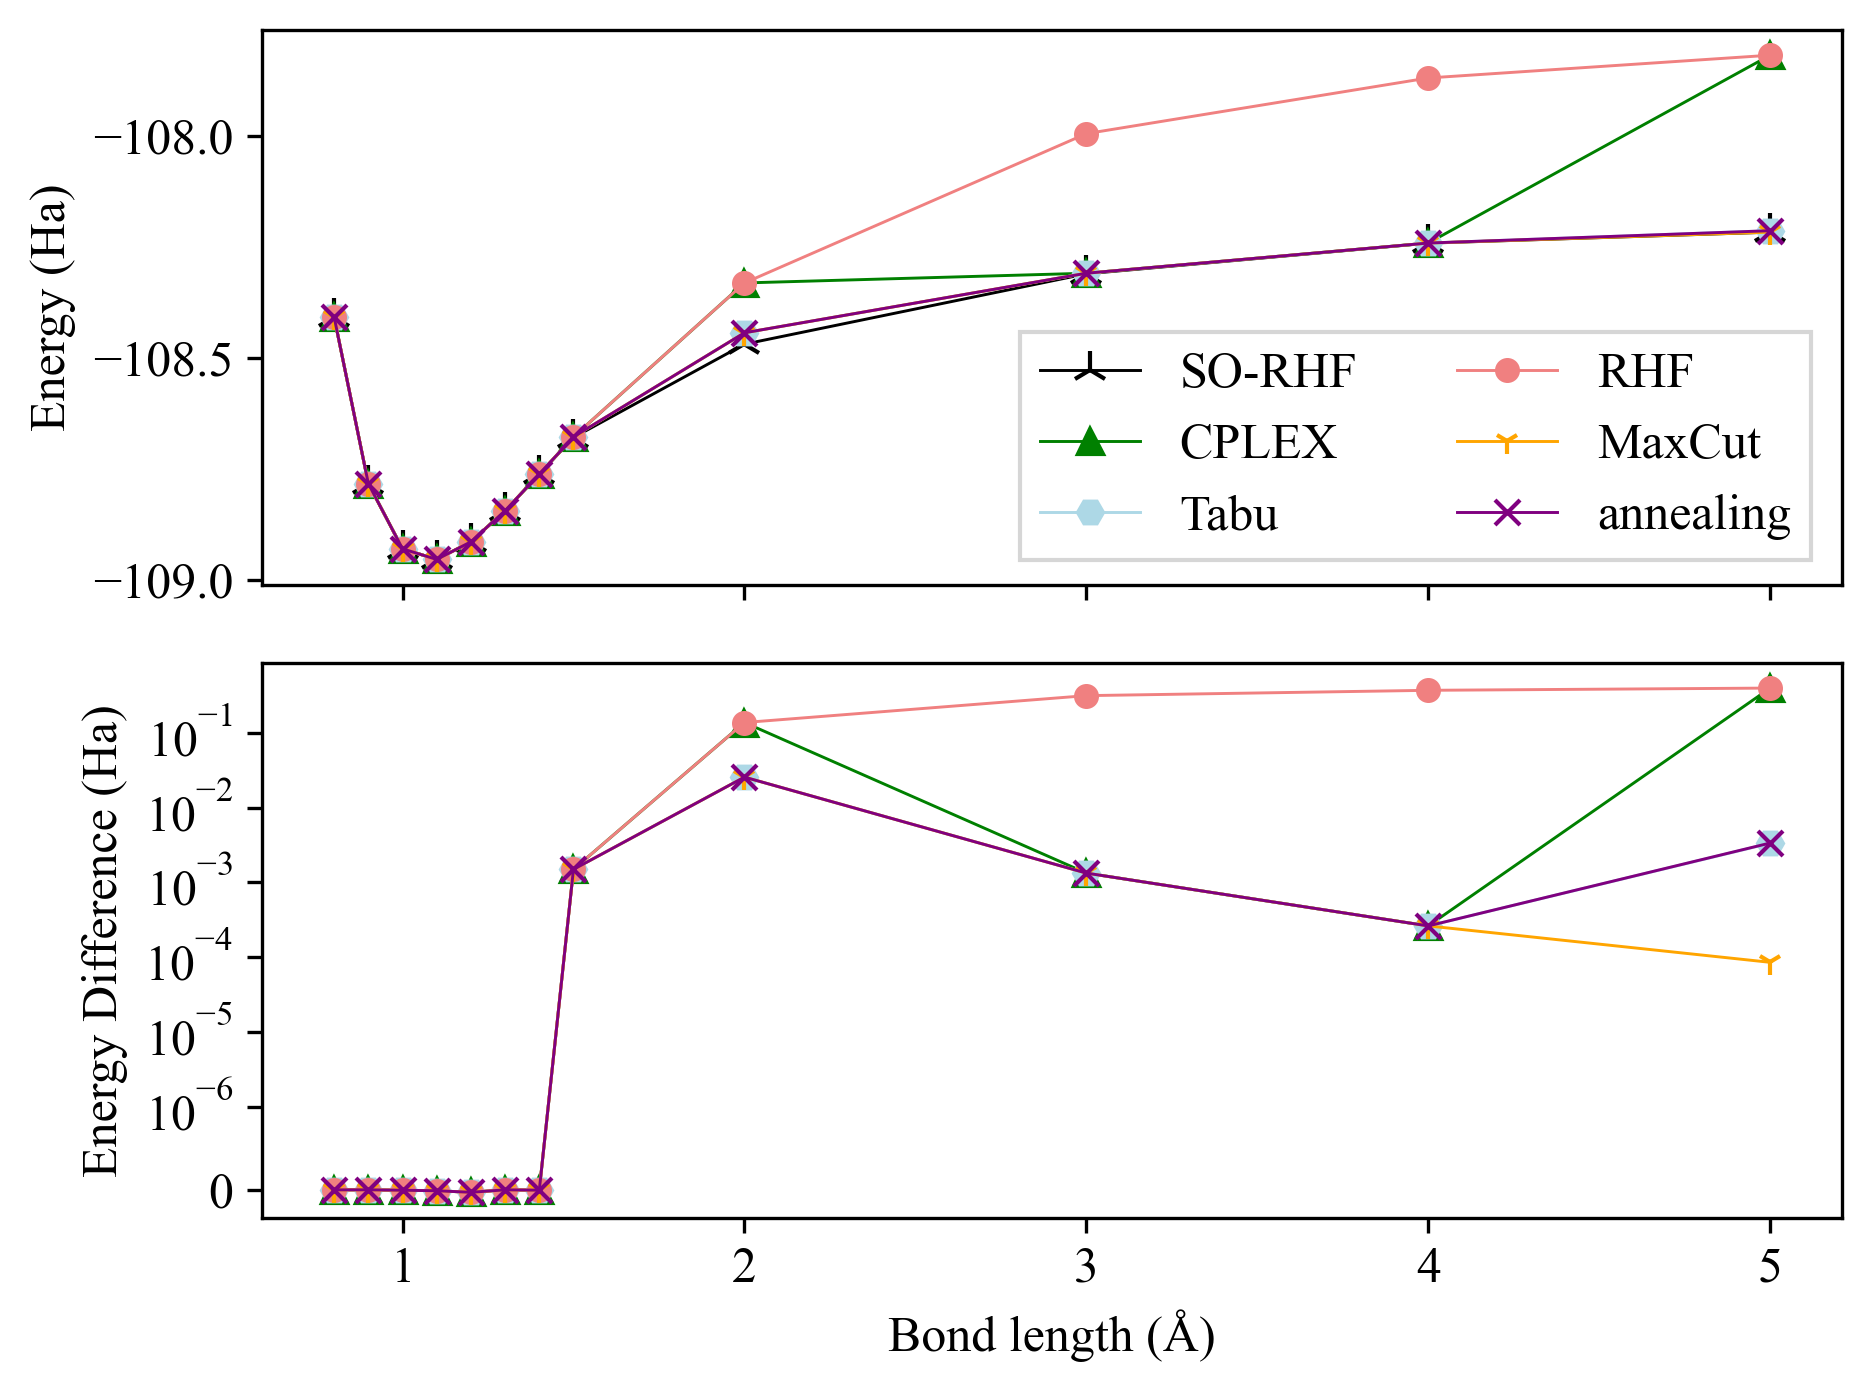

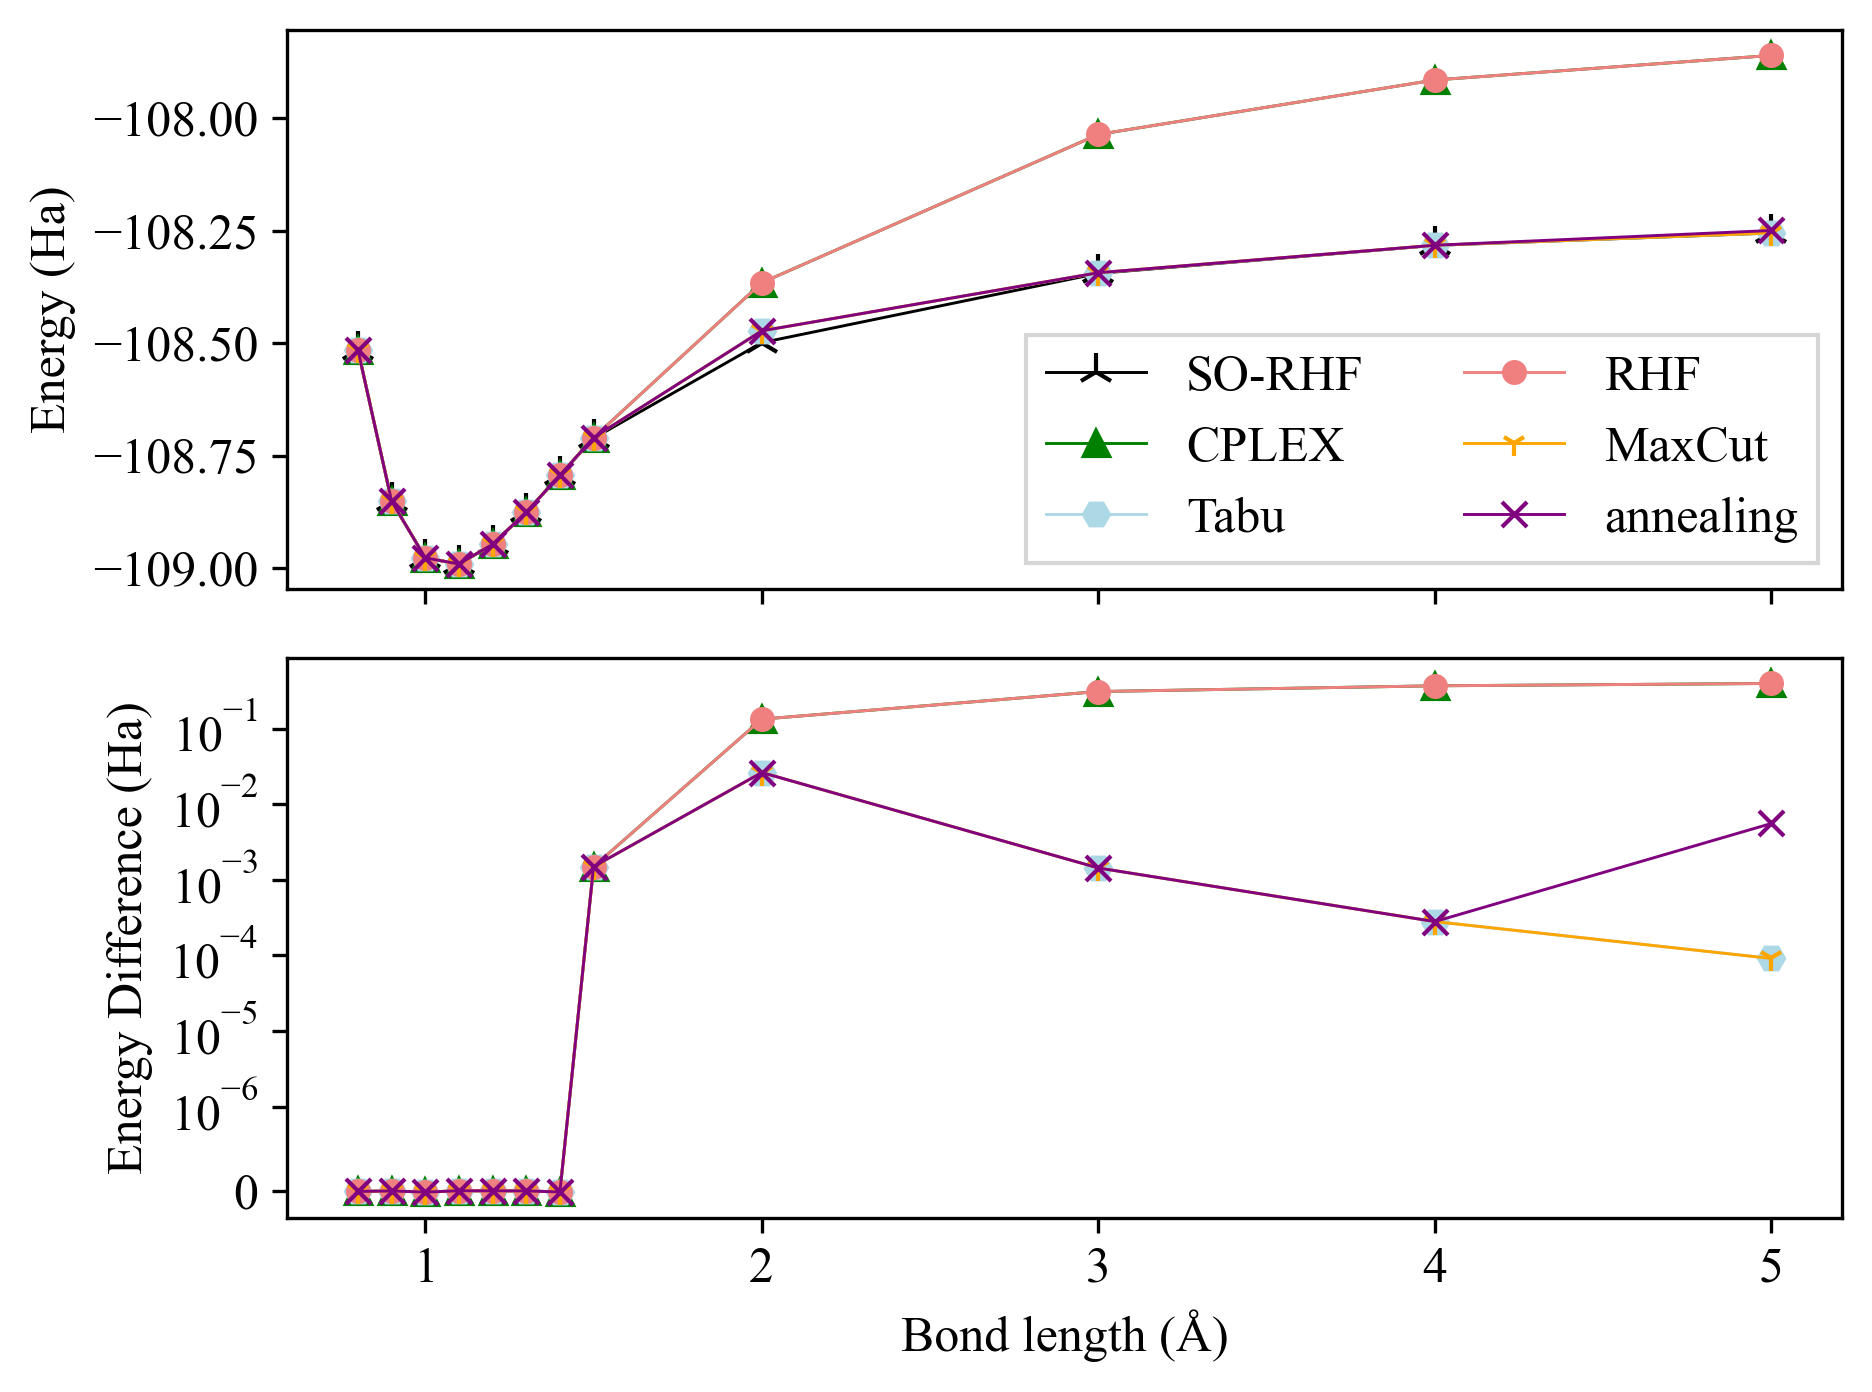

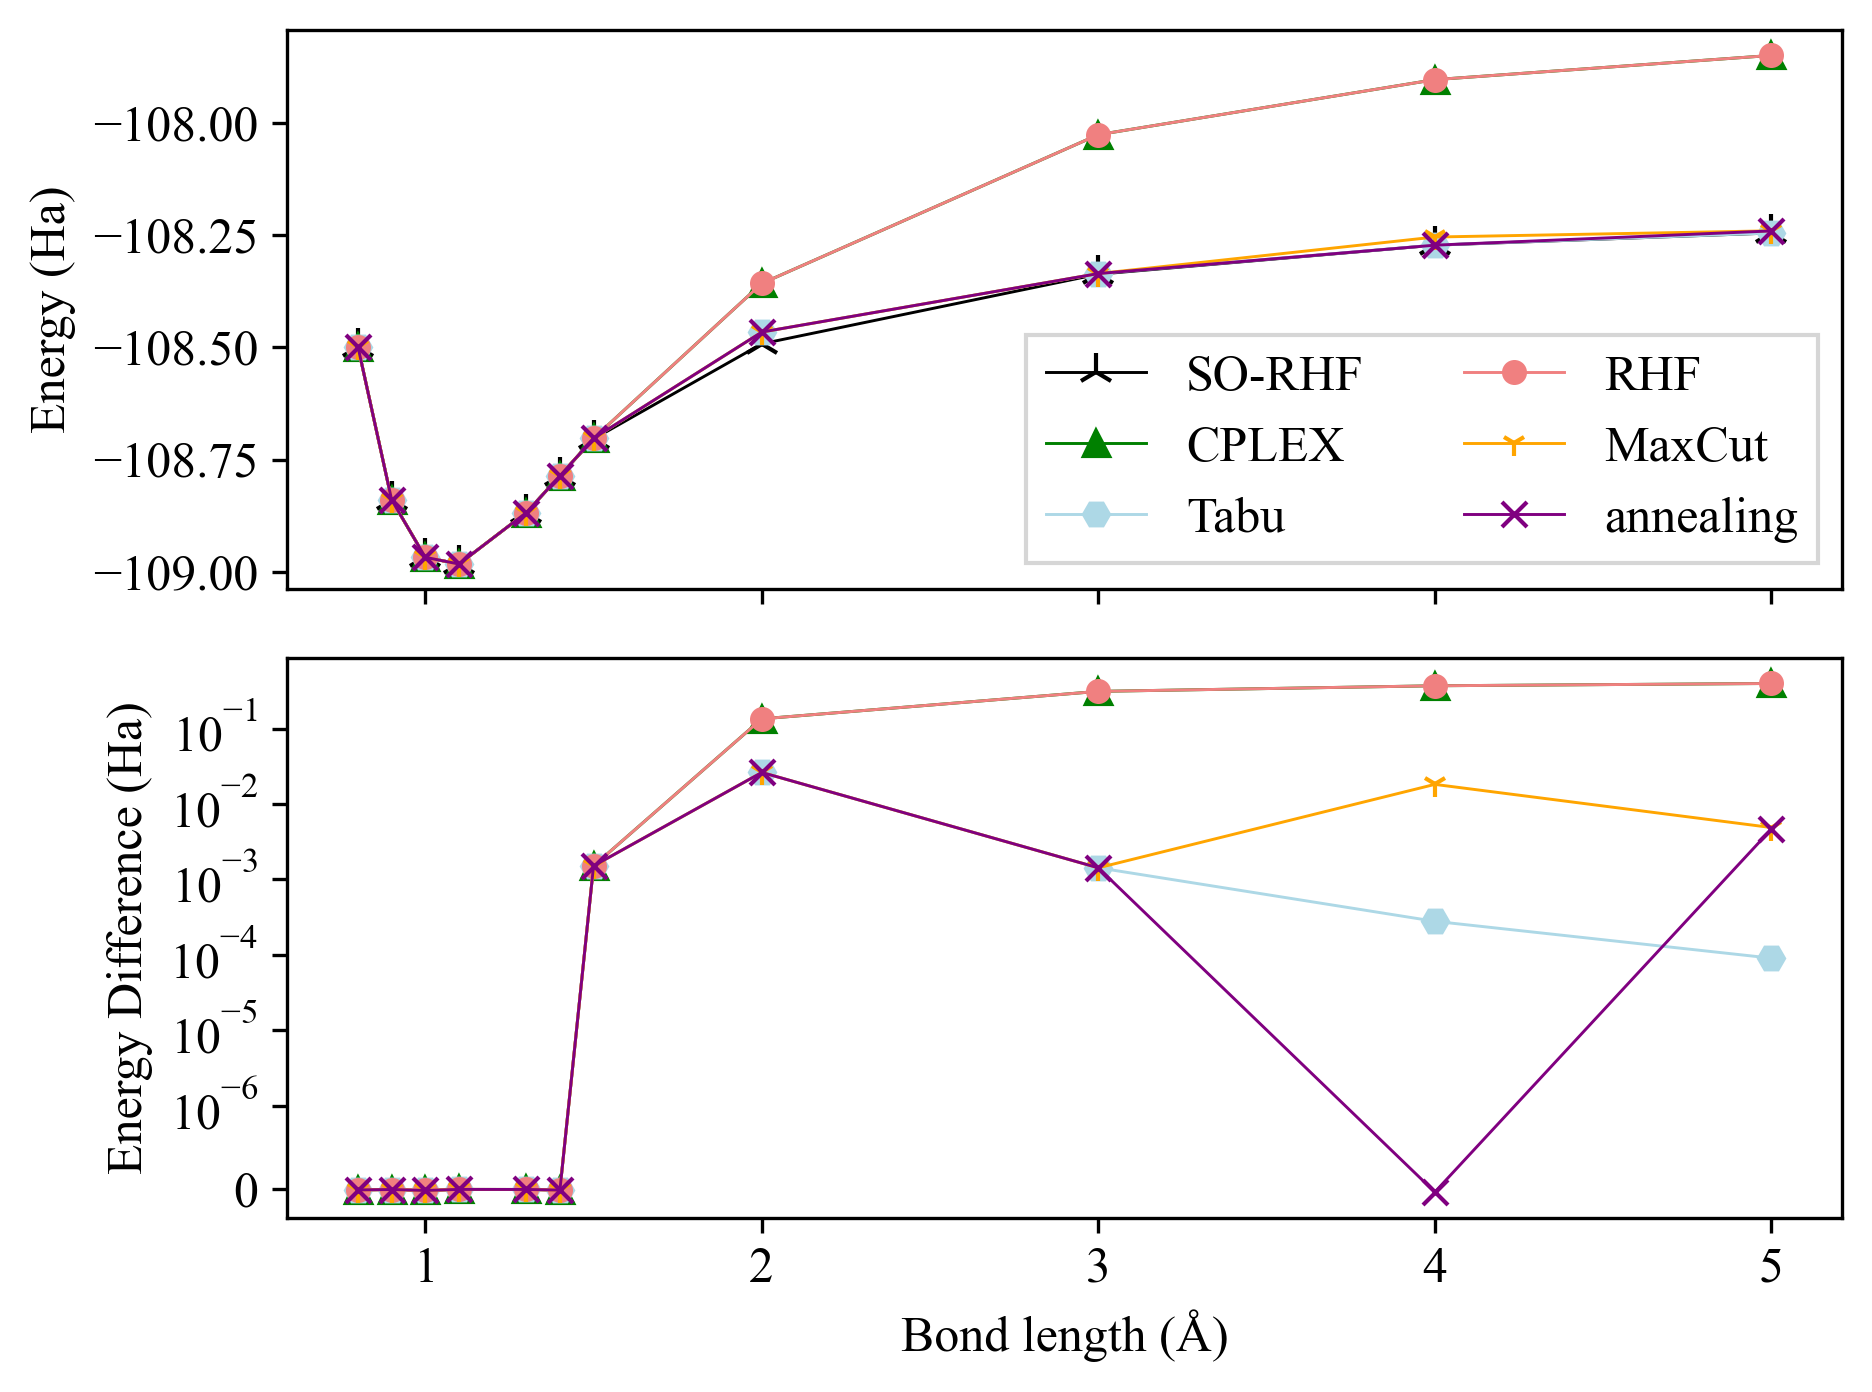

In [5]:
%matplotlib inline

for sub in subdirs:
    print(sub)
    sub_dir = os.path.join(classical_chem_dir,
                        sub)



    sorted_json = sorted(os.listdir(sub_dir), key=lambda s: int(re.search(r'_(\d+)\.json$', s).group(1)))
    b_lengths = np.array([int(re.search(r'_(\d+)\.json$', fname).group(1))/10 for fname in sorted_json ])

    sub_database = {'rhf_e_std_list': list(),
                    'rhf_stab_flag_list': list(),
                    'rhf_e_newton_list': list(),
                    'rhf_newton_flag_list': list(),

                    
                    }
    for opt in ['maxcut', 'SimulatedAnnealing', 'Tabu', 'cplex']:
        sub_database[opt]=  {
                                'E_opt_list':     list(),
                                'rhf_boost_list': list(),
                                'S2_list':        list(),
                                }

    for idx, f_json in enumerate(sorted_json):
        json_path = os.path.join(sub_dir, f_json)
        with open(json_path, 'r') as infile:
            data = json.load(infile)

        sub_database['rhf_e_std_list']       = sub_database['rhf_e_std_list']       +  [data['scf_std_energy']]
        sub_database['rhf_stab_flag_list']   = sub_database['rhf_stab_flag_list']   +  [data['scf_std_stability']]
        sub_database['rhf_e_newton_list']      = sub_database['rhf_e_newton_list']  +  [data['newton_SCF_energy'] ]
        sub_database['rhf_newton_flag_list'] = sub_database['rhf_newton_flag_list'] +  [data['newton_SCF_stability'] ]

        for opt in ['maxcut', 'SimulatedAnnealing', 'Tabu', 'cplex']:
            sub_database[opt]['E_opt_list'] =  sub_database[opt]['E_opt_list'] + [data[opt]['E_opt']]
            sub_database[opt]['rhf_boost_list'] =  sub_database[opt]['rhf_boost_list'] + [data[opt]['rhr_boost_e_tot']]
            sub_database[opt]['S2_list'] =  sub_database[opt]['S2_list'] + [data[opt]['S2_val']]


    ### PLOTTING 
    fig, ax_tuple = plt.subplots(2, 1, sharex=True, dpi=300)

    ##### NOTE THIS CHOOSES WHETHER FINAL SCF OPT HAS BEEN DONE <-----------------------------
    CHOSEN_str = 'rhf_boost_list'
    # CHOSEN_str = 'E_opt_list'


    newton = np.array(sub_database['rhf_e_newton_list'])
    for idx, diff_vec in enumerate([np.zeros(len(newton)),newton ]):

        ax = ax_tuple[idx]

        if idx ==0:
            ax.plot(b_lengths, sub_database['rhf_e_newton_list'], label='SO-RHF',
                marker='2', markersize=9, linestyle='-', linewidth=0.7, color='k') 

        ax.plot(b_lengths, np.array(sub_database['cplex'][CHOSEN_str])-diff_vec, label='CPLEX',
                marker='^', markersize=6, linestyle='-', linewidth=0.7, color='g') 

        ax.plot(b_lengths, np.array(sub_database['Tabu'][CHOSEN_str])-diff_vec, label='Tabu',
                marker='H', markersize=6, linestyle='-', linewidth=0.7, color='lightblue') 

        ax.plot(b_lengths, np.array(sub_database['rhf_e_std_list']) - diff_vec, label='RHF',
                    marker='.', markersize=10, linestyle='-', linewidth=0.7, color='lightcoral') 

        ax.plot(b_lengths, np.array(sub_database['maxcut'][CHOSEN_str])-diff_vec, label='MaxCut',
                marker='1', markersize=6, linestyle='-', linewidth=0.7, color='orange') 


        ax.plot(b_lengths, np.array(sub_database['SimulatedAnnealing'][CHOSEN_str])-diff_vec, label='annealing',
                marker='x', markersize=6, linestyle='-', linewidth=0.7, color='purple') 


    ax_tuple[0].set_ylabel(r'Energy (Ha)')
    ax_tuple[1].set_ylabel(r'Energy Difference (Ha)')
    ax_tuple[1].set_xlabel(r'Bond length (Å)')

    ax_tuple[1].set_yscale('symlog', linthresh=1e-6)

    ax_tuple[0].legend(loc='upper center', bbox_to_anchor=(0.73, 0.5),fancybox=False, shadow=False, ncol=2)


    plt.tight_layout()
    fig.savefig(f'N2_{sub}.png', dpi=300)

del data

# Access subdata

In [19]:
sub_index = 0 ## choose [0,1,2]
sub = subdirs[sub_index]
sub

'N2_ccpvdz'

In [20]:
sub_dir = os.path.join(classical_chem_dir,
                       sub)

sorted_json = sorted(os.listdir(sub_dir), key=lambda s: int(re.search(r'_(\d+)\.json$', s).group(1)))
b_lengths = np.array([int(re.search(r'_(\d+)\.json$', fname).group(1))/10 for fname in sorted_json ])

In [24]:
print(f'choose index between 0 and {len(sorted_json)-1}')
json_index = 0

json_path = os.path.join(sub_dir, sorted_json[json_index])
with open(json_path, 'r') as infile:
    data = json.load(infile)

print('bond length chosen:', b_lengths[json_index], 'Angstrom')

choose index between 0 and 11
bond length chosen: 0.8 Angstrom


In [25]:
list(data.keys())

['nao',
 'maxcut',
 'SimulatedAnnealing',
 'Tabu',
 'cplex',
 'scf_std_stability',
 'scf_std_energy',
 'scf_std_C_mat',
 'scf_std_mo_occ',
 'newton_SCF_iter',
 'newton_SCF_stability',
 'newton_SCF_energy',
 'newton_C_mat',
 'newton_rdm1']

In [11]:
list(data['maxcut'].keys())

['C_opt',
 'psi_opt',
 'converged',
 'iter_num',
 'E_opt',
 'E_list',
 'C_list',
 'psi_list',
 'rdm_list',
 'runtime',
 'b_len',
 'S2_val',
 'rhr_boost_e_tot',
 'rhr_boost_mo_coeff',
 'rhr_boost_rdm1']

In [16]:
S2_val = data['maxcut']['S2_val']

Energy_list = data['maxcut']['E_list']
C_list = data['maxcut']['C_list']  # <--- describes MO basis for Hamiltonian at each iteration step

S2_val = data['maxcut']['S2_val']
E_final = data['maxcut']['E_opt']
runtime = data['maxcut']['runtime']